In [87]:
using ReachabilityAnalysis, Plots

@taylorize function jet_engine!(dx, x, params, t)
    dx[1] = -x[2] - 1.5 * x[1]^2 - 0.5 * x[1]^3 - 0.5
    dx[2] = 3 * x[1] - x[2]
    return dx
end

In [86]:
X0 = Hyperrectangle(low=[0.8, 0.8], high=[1.2, 1.2])

#X0 = LazySets.center(X0) # FIXME
#X0 = Singleton([0.8, 0.8])

prob = @ivp(x' = jet_engine!(x), dim:2, x(0) ∈ X0)

sol = solve(prob, tspan=(0.0, 0.4), alg=TMJets(abs_tol=1e-14, orderQ=3, orderT=8));
sol = overapproximate(sol, Zonotope);

┌ Warning: Minimum absolute tolerance, 1.0e-29 reached.
└ @ ReachabilityAnalysis /home/mforets/.julia/dev/ReachabilityAnalysis/src/Algorithms/TMJets/post.jl:76


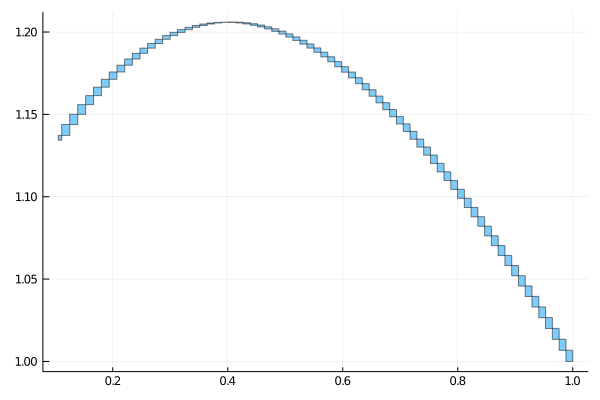

In [63]:
plot(sol, vars=(1, 2))

In [67]:
X0n = set(sol[end])
plot!(X0n)
sol = solve(IVP(prob.s, X0n), tspan=(0.0, 0.1), alg=TMJets(abs_tol=1e-14, orderQ=3, orderT=8));
#sol = overapproximate(sol, Zonotope);

┌ Warning: Minimum absolute tolerance, 1.0e-29 reached.
└ @ ReachabilityAnalysis /home/mforets/.julia/dev/ReachabilityAnalysis/src/Algorithms/TMJets/post.jl:76


In [84]:
X00 = overapproximate(X0n, Hyperrectangle)

sol = solve(IVP(prob.s, X00), tspan=(0.0, 0.1), alg=TMJets(abs_tol=1e-10, orderQ=2, orderT=6));

┌ Warning: Minimum absolute tolerance, 1.0e-29 reached.
└ @ ReachabilityAnalysis /home/mforets/.julia/dev/ReachabilityAnalysis/src/Algorithms/TMJets/post.jl:76


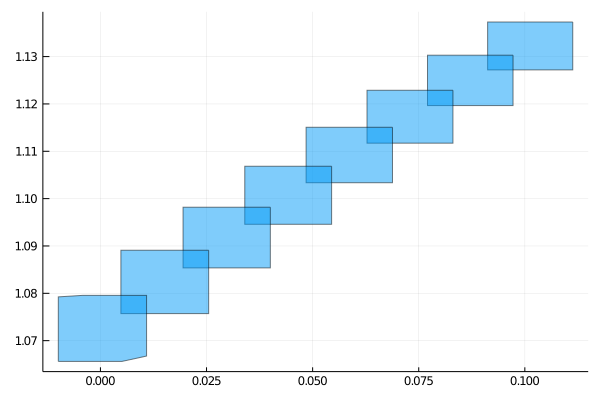

In [61]:
plot(sol, vars=(1, 2))

In [ ]:
http://publish.illinois.edu/c2e2-tool/example/

In [ ]:
using ReachabilityAnalysis
Dict([
    "opts" => Dict(:T=>10.0, :alg=>TMJets(abs_tol=1e-15, orderT=8, orderQ=1, max_steps=50_000)),
    "X0"   => Hyperrectangle(low=[0.8, 0.8], high=[1.2, 1.2]),
    "info" => Dict(
        "name" => "jet_engine",
        "dim" => 2,
        "linear" => false,
        "hybrid" => false
    )
])